
# Loss Functions

Loss functions are the way we define the goal of our neural network. Whenever we give a network a "correction" during training, that correction is based on the loss function. Sometimes the loss function is also called the objective function or cost function.

Fundamentally a loss function quantifies how wrong our network was when it is making predictions during training. Training happens in a series of batches per epoch, and during each batch some number of examples (we specify how many) will be processed by the network, the loss function is typically an average or aggregate of some kind across these samples.

In some cases machine learning experts will define custom loss functions, that capture domain specific details, but it is much more common to use one of a handful of well known loss functions. Broadly speaking, there are two categories of loss function, those used for __classification__ and those used for __regression__.

Unlike activation functions, loss functions are not part of the neural network architecture. Instead they are part of the training process, lets see how one network can be trained with a different loss functions, starting with classification:


In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(X_train_0, y_train_0),(X_test_0,y_test_0) = mnist.load_data()
print("Shape of train data, after loading from dataset: ", X_train_0.shape)
number_of_features = X_train_0[0].shape[0] * X_train_0[0].shape[1] 
unique_outcomes = np.unique(y_train_0)
number_of_unique_outcomes = len(unique_outcomes)

X_train = X_train_0.reshape(len(X_train_0), number_of_features)
X_test = X_test_0.reshape(len(X_test_0), number_of_features)

y_train = keras.utils.to_categorical(y_train_0, 
                                     num_classes=number_of_unique_outcomes,
                                     dtype='int')
y_test = keras.utils.to_categorical(y_test_0, 
                                     num_classes=number_of_unique_outcomes,
                                     dtype='int')

def model_accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['training_data', 'validation_data'], loc='best')
    plt.show()

Shape of train data, after loading from dataset:  (60000, 28, 28)


In [15]:
def model_build(number_of_features, number_of_unique_outcomes):
    model = Sequential()
    # first layer with input features and one hidden layer
    model.add(Dense(units = 10,
                    activation = 'relu',
                    input_shape=(number_of_features, )))

    # add 10 hidden layers of 10 neurons
    for i in range(10):
        model.add(Dense(units = 10,
                        activation='relu'))

    model.add(Dense(units = number_of_unique_outcomes,
                    activation = 'softmax'))
#     print(model.summary())
    
    return model


In [16]:
# For classification, Keras has several loss functions for classification
# Not all of the loss functions are designed for classification problems, such as mean_squared_error
# but we can still tell keras to use those functions, though the results may not be great
# There are also some special loss functions that are specific to binary classification. 
# Lets look at some that are:
loss_functions = [
    'categorical_crossentropy',
    'categorical_hinge',
    'kullback_leibler_divergence',
    'hinge',
    'mean_squared_error'
]

history_list = []


10000/10000 [==============================] - 0s 24us/step



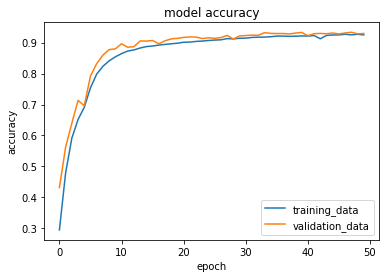


Testing data Loss for categorical_crossentropy:  0.33

Testing data Accuracy for categorical_crossentropy:  0.91

10000/10000 [==============================] - 0s 27us/step



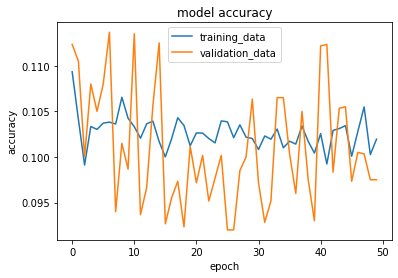


Testing data Loss for categorical_hinge:  1.0

Testing data Accuracy for categorical_hinge:  0.1

10000/10000 [==============================] - 0s 24us/step



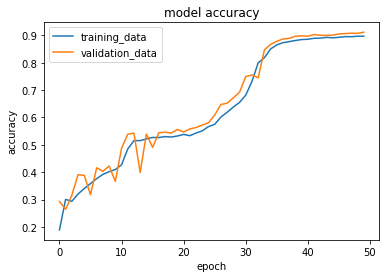


Testing data Loss for kullback_leibler_divergence:  0.41

Testing data Accuracy for kullback_leibler_divergence:  0.9

10000/10000 [==============================] - 0s 35us/step



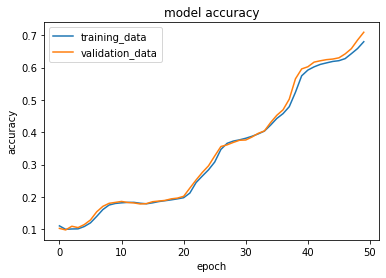


Testing data Loss for hinge:  0.97

Testing data Accuracy for hinge:  0.69

10000/10000 [==============================] - 0s 23us/step



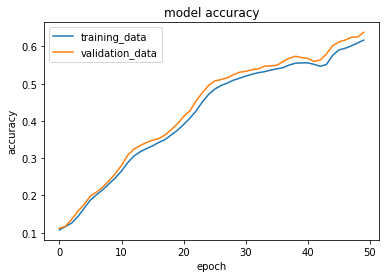


Testing data Loss for mean_squared_error:  0.04

Testing data Accuracy for mean_squared_error:  0.63


In [18]:
for i in range(len(loss_functions)):
    model = model_build(number_of_features, number_of_unique_outcomes)
    model.compile(optimizer="sgd", 
              loss=loss_functions[i], 
              metrics=['accuracy'])
    history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=50,
                    verbose=0,
                    validation_split=0.1)

    print()
    loss, accuracy = model.evaluate(x = X_test,
                                    y = y_test)

    print()
    model_accuracy_plot(history)
    print()
    print('Testing data Loss for {}: '.format(loss_functions[i]), round(loss, 2))
    print()
    print('Testing data Accuracy for {}: '.format(loss_functions[i]), round(accuracy, 2))
    history_list.append(history)

As we can see, the choice of a loss function can have a very significant impact on a model's performance. Categorical cross entropy is the most common choice for classification tasks, a good rule of thumb is to just start there and explore others only when nessesary.

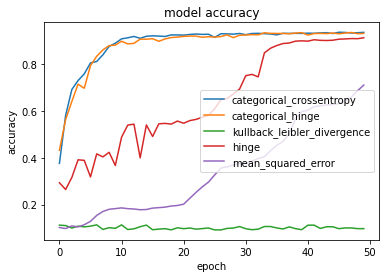

In [20]:
# Cleaner visulizations all in one place
for loss_function, history in zip(loss_functions, history_list):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loss_functions, loc='best')
plt.show()